<a href="https://colab.research.google.com/github/samanthastaheli/cse450_module2/blob/main/LearningModelRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Document

## Import Pandas and the Data Set

In [45]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [37]:
campaign["emp.var.rate"].value_counts()
# campaign["cons.price.idx"].value_counts()
# campaign["cons.conf.idx"].value_counts()
# campaign["euribor3m"].value_counts()
# campaign["nr.employed"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [38]:
split_positive = campaign[campaign["emp.var.rate"] >= 0]
split_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23997 entries, 0 to 23996
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23997 non-null  int64  
 1   job             23997 non-null  object 
 2   marital         23997 non-null  object 
 3   education       23997 non-null  object 
 4   default         23997 non-null  object 
 5   housing         23997 non-null  object 
 6   loan            23997 non-null  object 
 7   contact         23997 non-null  object 
 8   month           23997 non-null  object 
 9   day_of_week     23997 non-null  object 
 10  campaign        23997 non-null  int64  
 11  pdays           23997 non-null  int64  
 12  previous        23997 non-null  int64  
 13  poutcome        23997 non-null  object 
 14  emp.var.rate    23997 non-null  float64
 15  cons.price.idx  23997 non-null  float64
 16  cons.conf.idx   23997 non-null  float64
 17  euribor3m       23997 non-null 

## One Hot Encode

In [39]:
#campaign_unknown = campaign.replace('unknown', np.nan)
#campaign_drop_unknown = campaign_drop_unknown.dropna()

ml_education = split_positive.education.str.replace("basic.4y", '4').str.replace('basic.6y', '6').str.replace('basic.9y', '9').str.replace('high.school', '12').str.replace('professional.course', '14').str.replace('illiterate', '2').str.replace('university.degree', '16').str.replace('unknown', '0').astype('float')

age_bins = [15, 25, 35, 45, 55, 65, 100]
age_labels = ["younger", "young", "middle", "middlish", "old", "older"]

str(age_labels)

ml_age = pd.cut(split_positive['age'], bins=age_bins, labels=age_labels).astype(str)

ml_age = pd.get_dummies(ml_age)

ml_answers = split_positive.y.str.replace("no", "0").str.replace("yes", '1').astype('float')

ml_pdays = split_positive.pdays.replace(999, -1)

ml_onehot = pd.get_dummies(split_positive.filter(['job','month','marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']))

C:\Users\sstaheli\AppData\Local\Temp\ipykernel_2780\1074840905.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ml_education = split_positive.education.str.replace("basic.4y", '4').str.replace('basic.6y', '6').str.replace('basic.9y', '9').str.replace('high.school', '12').str.replace('professional.course', '14').str.replace('illiterate', '2').str.replace('university.degree', '16').str.replace('unknown', '0').astype('float')


In [40]:
final_ml = pd.concat([ml_onehot, 
                         split_positive.filter(['campaign', 'previous',
       'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']),
                         ml_pdays,
                         ml_age,
                         ml_education], axis=1)



final_ml = final_ml.drop("job_student", axis = 1, inplace = False)

## View Dataframe Info

In [41]:
final_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23997 entries, 0 to 23996
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_admin.            23997 non-null  uint8  
 1   job_blue-collar       23997 non-null  uint8  
 2   job_entrepreneur      23997 non-null  uint8  
 3   job_housemaid         23997 non-null  uint8  
 4   job_management        23997 non-null  uint8  
 5   job_retired           23997 non-null  uint8  
 6   job_self-employed     23997 non-null  uint8  
 7   job_services          23997 non-null  uint8  
 8   job_technician        23997 non-null  uint8  
 9   job_unemployed        23997 non-null  uint8  
 10  job_unknown           23997 non-null  uint8  
 11  month_aug             23997 non-null  uint8  
 12  month_jul             23997 non-null  uint8  
 13  month_jun             23997 non-null  uint8  
 14  month_may             23997 non-null  uint8  
 15  marital_divorced   

## Import Libraries

In [42]:
# Model using poutcome, job, and marital
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Select Features for the Training

In [46]:
features = ['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_technician',
 'job_unemployed',
 'job_unknown',
#  'month_apr',
 'month_aug',
#  'month_dec',
 'month_jul',
 'month_jun',
#  'month_mar',
 'month_may',
#  'month_nov',
#  'month_oct',
#  'month_sep',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
#  'poutcome_failure',
 'poutcome_nonexistent',
#  'poutcome_success',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pdays',
 'middle',
 'middlish',
 'old',
#  'older',
 'young',
 'younger',
 'education']

## Drop NA and Prepare X and y

In [47]:
final_ml = final_ml.dropna()
X = pd.get_dummies(final_ml[features], drop_first=True)
y = ml_answers

## Balance the Data Set

In [48]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_new, y_new = ro.fit_resample(X, y)

## Split into the Train and Test sets and Build the Tree


In [49]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

# Build the decision forest
clf = RandomForestClassifier(n_estimators = 100)

## Train the Model

In [50]:
# Train it
clf.fit(X_train, y_train)

RandomForestClassifier()

## Test the Model

In [51]:
# Test it 
clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)

## The Confusion Matrix

c:\Users\sstaheli\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


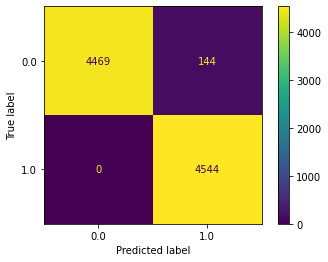

In [52]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X_test, y_test)

## View Stats

In [57]:
stats = metrics.classification_report(y_test, y_predicted)
print(stats)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      4613
         1.0       0.97      1.00      0.98      4544

    accuracy                           0.98      9157
   macro avg       0.98      0.98      0.98      9157
weighted avg       0.98      0.98      0.98      9157



## View the Tree(s)

In [ ]:
# Test it 
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

euribor3m         0.356197
nr.employed       0.303748
emp.var.rate      0.168730
cons.conf.idx     0.128743
cons.price.idx    0.042582
dtype: float64